# Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Read Data Into Jupyter

In [2]:
# Main dataset
# Declare path variable where dataset is saved
input_path = r'/Users/robertbanks/Desktop/Projects/World_Cup/Fifa_world_cup_matches.csv'
# Read file into Jupyter
data = pd.read_csv(input_path)


# Clean Data and Add Useful Columns

In [3]:
# Data is structured by match, with both teams in the same row
# Restructure so each row represents a given team's stats, not both teams' from the game

# Create game_id column in dataset
data['game_id'] = range(len(data))

# Create opponent columns in dataset
data['opponent team1'] = data['team2'] 
data['opponent team2'] = data['team1']

# Create list of headers in dataset
data_headers = []
for header in list(data):
    data_headers.append(header)
# Create lists of all headers which contain 'team1,' team2,' or neither
team1_headers = []
team2_headers = []
neutral_headers = []
for header in data_headers:
    if 'team1' in header:
        team1_headers.append(header)
    elif 'team2' in header:
        team2_headers.append(header)
    else:  
        neutral_headers.append(header)

for header in neutral_headers:
    team1_headers.append(header)
    team2_headers.append(header)

team1_headers
# Create copies of team1_headers and team2_headers so we have originals
# Going to modify below to standardize cols in a concatenated df
team1_headers_orig = team1_headers
team2_headers_orig = team2_headers

# Define function to remove 'team1' and 'team2' from header names
def format_headers(header_list, substring):
    header_list[0] = 'team'
    i = 0
    while i < len(header_list):
        header_list[i] = header_list[i].replace(substring,'').strip()
        i += 1
        
# Inside loop, we will:
    # Filter original data to create dataframes with just team1and team2 columns respectively
    # Run function for team1 and team2

header_list_options = [team1_headers, team2_headers]
header_list_orig = [team1_headers_orig, team2_headers_orig]
substring_options = ['team1', 'team2']

i = 0
while i < len(header_list_options):
    if i == 0:
        team1_df = data[header_list_orig[i]]
    else:
        team2_df = data[header_list_orig[i]]
    format_headers(header_list_options[i], substring_options[i])
    i += 1
    
# Replace headers in both team1_df and team2_df with the new headers
# Then concat into one df to use for visualizations
team1_df.columns = team1_headers
team2_df.columns = team2_headers
team_data = pd.concat([team1_df, team2_df])
team_data

# Add team rankings per Fifa to dataframe
rankings_path = r'/Users/robertbanks/Desktop/Projects/World_Cup/FIFA_Rankings.xlsx'
rankings_data_team = pd.read_excel(rankings_path, sheet_name = 'Sheet1')
rankings_data_opponent = pd.read_excel(rankings_path, sheet_name = 'Sheet2')

# Merge rankings_data with team_data to include team ranking in main dataframe
data_with_rankings = pd.merge(team_data, rankings_data_team, on = 'team')
data_with_rankings = pd.merge(data_with_rankings, rankings_data_opponent, on = 'opponent')

# Possession and team columns are currently formatted as objects
# Convert team name to string
data_with_rankings['team'] = data_with_rankings['team'].astype("string")

# Conert possession to float
data_with_rankings['possession'] = data_with_rankings['possession'].astype("string")
data_with_rankings['possession'] = data_with_rankings['possession'].str.rstrip("%").astype(float)/100

# Create column for ranking differential between team and opponent
data_with_rankings['ranking_differential'] = data_with_rankings['opponent_ranking'] - data_with_rankings['team_ranking']

# Explore Standardized Data

R Squared: 0.19739842179741263)
Intercept: 2.035998076265714
Coefficients: [4.40255665 0.03715453]


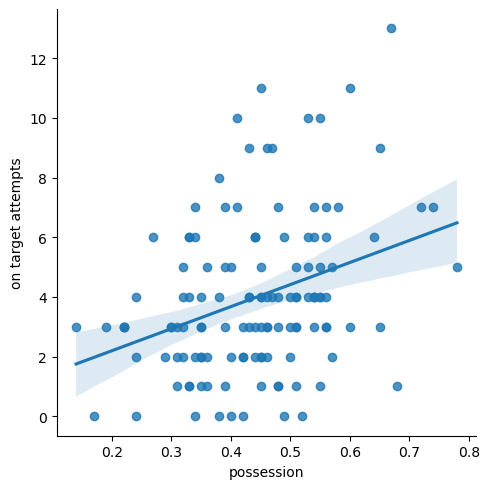

In [5]:
# Regress on target attempts on possession and ranking differential
model = LinearRegression()

# Define regressors
regressors = ['possession', 'ranking_differential']
x = data_with_rankings[regressors]

# Define dependent variable
y = data_with_rankings['on target attempts']

# Calculate regression model
model = LinearRegression().fit(x,y)

# Obtain regression results
r_squared = model.score(x,y)
intercept = model.intercept_
coefficients = model.coef_

print(f"R Squared: {r_squared})")
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

sns.lmplot(data = data_with_rankings, x = 'possession', y = 'on target attempts')

<AxesSubplot: xlabel='possession', ylabel='on target attempts'>

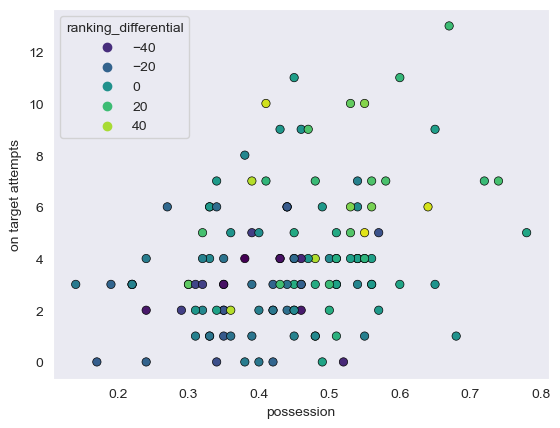

In [6]:
# Print list of columns
# col_list = list(data_with_rankings)
# print(col_list)

# Scatterplot of goals scored depending on possession
sns.set_style("dark")
sns.scatterplot(data = data_with_rankings, x = "possession", y = "on target attempts", hue = "ranking_differential", palette = "viridis", edgecolor = "black")

# Learning Resources

#### Remove leading and trailing spaces 
https://www.freecodecamp.org/news/python-strip-how-to-trim-a-string-or-line/

#### Change data type / strip specific text
https://levelup.gitconnected.com/convert-percentage-string-to-numeric-and-vice-versa-in-pandas-18a3d66e2853

#### Seaborn color pallettes
https://seaborn.pydata.org/tutorial/color_palettes.html